In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

In [16]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [17]:
genome = readGenome('phix.fa')

In [18]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences
# this will yield a list of the positions where a match occurs in the template t

In [19]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [20]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [21]:
# Generate 100 reads of length 100
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

In [22]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [23]:
phix_reads = readFastq('ERR266411_1.first1000.fastq')

In [24]:
numMatched = 0
n = 0
for r in phix_reads:    # loop the list of reads that were read in as phix_reads
    matches = naive(r, genome)    # use naive match function to test if the reads align to the phix genome
    n += 1
    if len(matches) > 0:   # is there at least 1 match for a given read (there could be more than one?)
        numMatched += 1    # tally the number of aligned reads
print('%d / %d reads matched the genome exactly!' % (numMatched, n))
# only 7/1000 reads matched exactly - because of sequencing error? may be differences between the sequenced organism and the template
# maybe we should just take a part of the read instead?

0 / 2 reads matched the genome exactly!


In [25]:
# Now let's try matching just the first 30 bases of each read
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))
# this improved the matching, but it's still less than 50% - doesn't take into account forward vs. reverse!

0 / 2 reads matched the genome exactly!


In [26]:
# Paste in the reverse complement function from 1.02
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [27]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome)) # this adds any matches that occurred on the reverse complement
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))
# much better!

KeyError: 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC'

1. Question 1

How many times does AGGT or its reverse complement ACCT occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.

In [28]:
lamda = readGenome('lambda_virus.fa')

In [29]:
# create a new naive matching algorithm that deals with reverse complement
def new_naive(p, t):
    r = reverseComplement(p)
    if r == p:
        return naive(p,t)
    else:
        return naive(p,t) + naive (r,t)
# this will yield a list of the positions where a match occurs in the template t

In [30]:
match = new_naive("AGGT", lamda)
len(match)


306

In [ ]:
forward = naive("AGGT",lamda)
len(forward)

In [ ]:
reverse = naive("ACCT",lamda)
len(reverse)

In [31]:
# naive exact matching algorithm that is strand-aware
# Instead of looking only for occurrences of P in T, additionally look for occurrences of the reverse complement of P in T. 
def naive_with_rc(p, t):
    r = reverseComplement(p)
    if r == p:
        return naive(p,t)
    else:
        return naive(p,t) + naive(r,t)

In [32]:
occurrences = new_naive('AGGT', lamda)
print('AGGT in lambda_virus:')
print('# occurrences: %d' % len(occurrences))

AGGT in lambda_virus:
# occurrences: 306


2. Question 2

How many times does TTAA or its reverse complement occur in the lambda virus genome?

Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [33]:
occurrences = new_naive('TTAA', lamda)
print('TTAA in lambda_virus:')
print('# occurrences: %d' % len(occurrences))

TTAA in lambda_virus:
# occurrences: 195


3. Question 3

What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT  is at offset 29, then report 29.

In [34]:
print('The left-most occurrence of ACTAAGT in lambda_virus: %d' % min(new_naive('ACTAAGT',lamda)))


The left-most occurrence of ACTAAGT in lambda_virus: 26028


4. Question 4

What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [35]:
print('The left-most occurrence of AGTCGA in lambda_virus: %d' % min(new_naive('AGTCGA',lamda)))

The left-most occurrence of AGTCGA in lambda_virus: 450


5. Question 5

As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT') should return the list [0, 4]

Hint: See this notebook for a few examples you can use to test your naive_2mm function.

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 


WRONG!

In [36]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        mismatch = 0
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                mismatch += 1
                if mismatch > 2:
                    match = False
                    break
        if match:
            occurrences.append(i)
    return occurrences

In [37]:
occurrences_5 = naive_2mm('TTCAAGCC', lamda)

print('TTCAAGCC in lambda_virus:')
print('# occurrences: %d' % len(occurrences_5))

TTCAAGCC in lambda_virus:
# occurrences: 191


6. Question 6

What is the offset of the leftmost occurrence of AGGAGGTT
in the Lambda virus genome when allowing up to 2 mismatches?


WRONG!

In [38]:
print('The left-most occurrence of AGGAGGTT in lambda_virus: %d' % min(naive_2mm('AGGAGGTT',lamda)))

The left-most occurrence of AGGAGGTT in lambda_virus: 49


Question 7

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question. The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.





WRONG!

In [ ]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

In [7]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

In [9]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [10]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)


[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


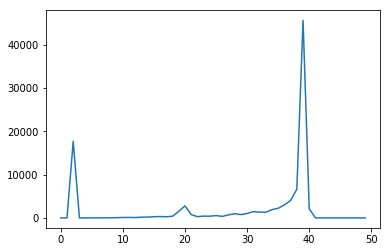

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
h = createHist(quals)
print(h)
plt.plot(range(len(h)), h)
plt.show()

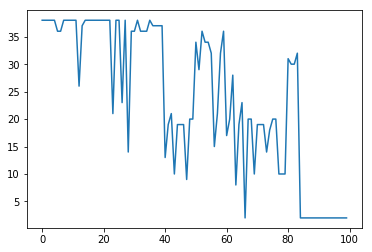

[38, 38, 38, 38, 38, 36, 36, 38, 38, 38, 38, 38, 26, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 21, 38, 38, 23, 38, 14, 36, 36, 38, 36, 36, 36, 38, 37, 37, 37, 37, 13, 19, 21, 10, 19, 19, 19, 9, 20, 20, 34, 29, 36, 34, 34, 32, 15, 21, 32, 36, 17, 20, 28, 8, 19, 23, 2, 20, 20, 10, 19, 19, 19, 14, 18, 20, 20, 10, 10, 10, 31, 30, 30, 32, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [47]:
def findQByPos(qualities):
    # Keep track of the number of G/C bases and the total number of bases at each position
    q = [0] * 100
    totals = [0] * 100
    for qual in qualities:
        for i in range(len(qual)):
            q[i] = phred33ToQ(qual[i])
            totals[i] += 1
    return q

q = findQByPos(quals)
plt.plot(range(len(q)), q)
plt.show()
print(q)

UsageError: Line magic function `%fastqp` not found.
